In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('SalesCallData.csv')
df.head()

,Abandoned,Branch,Busy Hours,Busy Minutes,Total Wait Time,Call Purpose,Calls,Hours,Incoming Wait Time,Incoming or Outgoing,...,Not Ready Hours,Not Ready Minutes,Number of Records,Queue,Rep ID (group),Rep ID,Sale,Waiting Hours,Waiting Minutes,Shift
0,0,North,0.150000,9,3.0,Complaint,1,9,1.0,Incoming,...,0.033333,2,1,B,"Amanda, Andy, Brent and 2 more",Brent,NO,0.066667,4,Morning
1,0,North,0.150000,9,3.0,Complaint,1,9,1.0,Incoming,...,0.033333,2,1,B,"Amanda, Andy, Brent and 2 more",Duke,NO,0.066667,4,Morning
2,0,North,0.166667,10,6.0,Complaint,1,9,4.0,Incoming,...,0.033333,2,1,A,"Joe, Lilly, Todd and 1 more",Joe,NO,0.050000,3,Evening
3,0,South,0.166667,10,3.0,Complaint,1,9,2.0,Incoming,...,0.016667,1,1,C,"Eric, George, Helga",Eric,NO,0.050000,3,Afternoon
4,0,South,0.133333,8,7.0,Complaint,1,9,5.0,Incoming,...,0.033333,2,1,D,"Eric, George, Helga",Helga,NO,0.033333,2,Morning


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Abandoned             559 non-null    int64  
 1   Branch                559 non-null    object 
 2   Busy Hours            559 non-null    float64
 3   Busy Minutes          559 non-null    int64  
 4   Total Wait Time       208 non-null    float64
 5   Call Purpose          559 non-null    object 
 6   Calls                 559 non-null    int64  
 7   Hours                 559 non-null    int64  
 8   Incoming Wait Time    208 non-null    float64
 9   Incoming or Outgoing  559 non-null    object 
 10  Lost Call (bin)       559 non-null    int64  
 11  Lost Call             559 non-null    int64  
 12  Not Ready Hours       559 non-null    float64
 13  Not Ready Minutes     559 non-null    int64  
 14  Number of Records     559 non-null    int64  
 15  Queue                 5

In [17]:
df = df.drop_duplicates()
df.columns = df.columns.str.strip().str.replace(" ", "_")

In [18]:
df['Sale'] = df['Sale'].astype(str).str.strip().str.upper()
df = df[df['Sale'].isin(['YES', 'NO'])]
df['Sale_Flag'] = df['Sale'].map({'YES': 1, 'NO': 0})

In [19]:
df['Calls'] = pd.to_numeric(df['Calls'], errors='coerce')
df = df.dropna(subset=['Calls', 'Branch', 'Shift', 'Call_Purpose', 'Rep_ID'])

print("\nCleaned shape:", df.shape)


Cleaned shape: (558, 23)


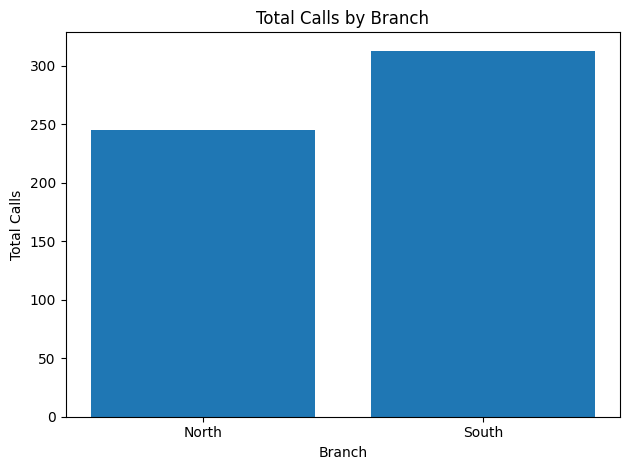

In [26]:
s = df.groupby('Branch')['Calls'].sum().sort_values()
plt.bar(s.index, s.values)
plt.title('Total Calls by Branch')
plt.xlabel('Branch'); plt.ylabel('Total Calls')
plt.tight_layout(); plt.show()

South handles more total call volume than North (workload imbalance)

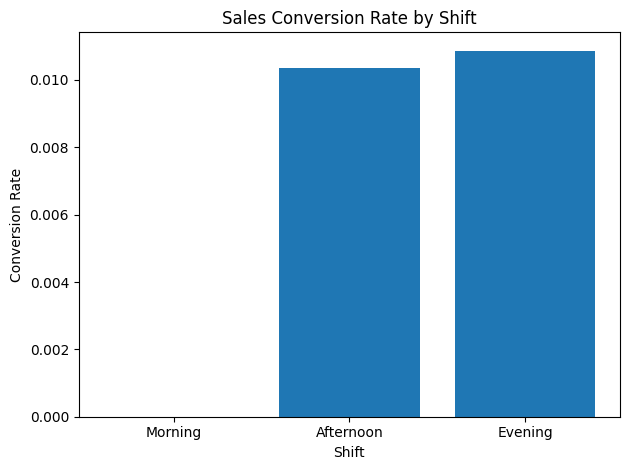

In [27]:
# Sales Conversion Rate by Shift
s = df.groupby('Shift')['Sale_Flag'].mean().sort_values()
plt.bar(s.index, s.values)
plt.title('Sales Conversion Rate by Shift')
plt.xlabel('Shift'); plt.ylabel('Conversion Rate')
plt.tight_layout(); plt.show()

Conversion varies by shift; later shifts slightly higher than morning.


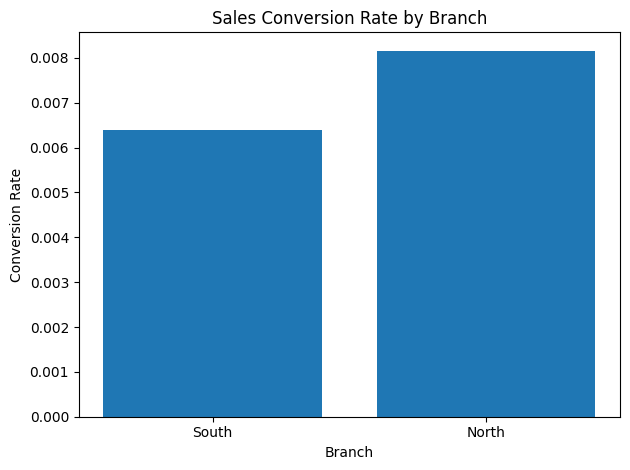

In [28]:
# Sales Conversion Rate by Branch
s = df.groupby('Branch')['Sale_Flag'].mean().sort_values()
plt.bar(s.index, s.values)
plt.title('Sales Conversion Rate by Branch')
plt.xlabel('Branch'); plt.ylabel('Conversion Rate')
plt.tight_layout(); plt.show()

North converts better despite lower volume—efficiency differs by branch.


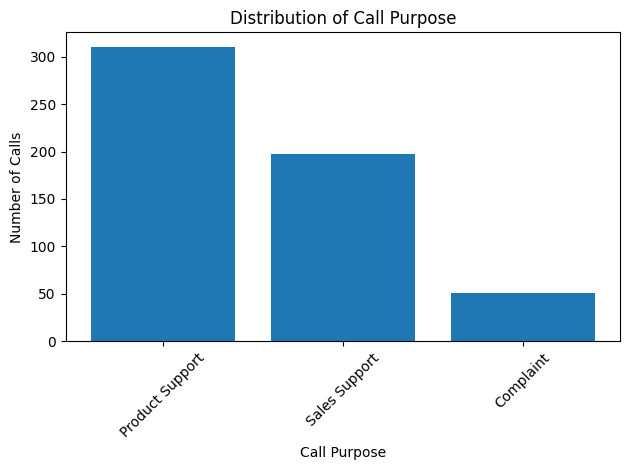

In [29]:
# Distribution of Call Purpose
s = df['Call_Purpose'].value_counts()
plt.bar(s.index, s.values)
plt.title('Distribution of Call Purpose')
plt.xlabel('Call Purpose'); plt.ylabel('Number of Calls')
plt.xticks(rotation=45)
plt.tight_layout(); plt.show()

Most calls are support-related; complaints are a smaller share.


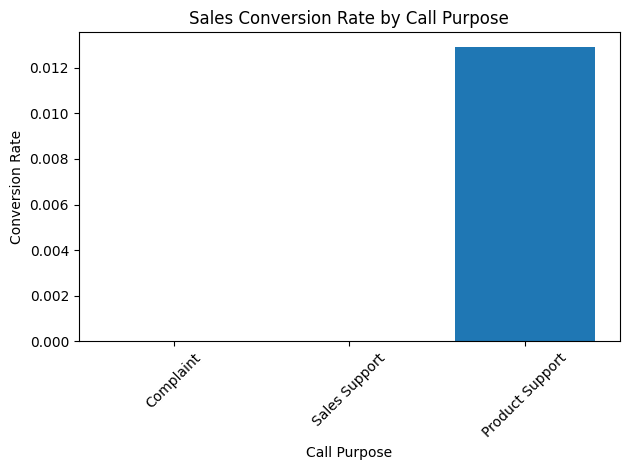

In [30]:
# Conversion Rate by Call Purpose
s = df.groupby('Call_Purpose')['Sale_Flag'].mean().sort_values()
plt.bar(s.index, s.values)
plt.title('Sales Conversion Rate by Call Purpose')
plt.xlabel('Call Purpose'); plt.ylabel('Conversion Rate')
plt.xticks(rotation=45)
plt.tight_layout(); plt.show()

Sales come mainly from Product Support calls—Sales Support/Complaints rarely convert.


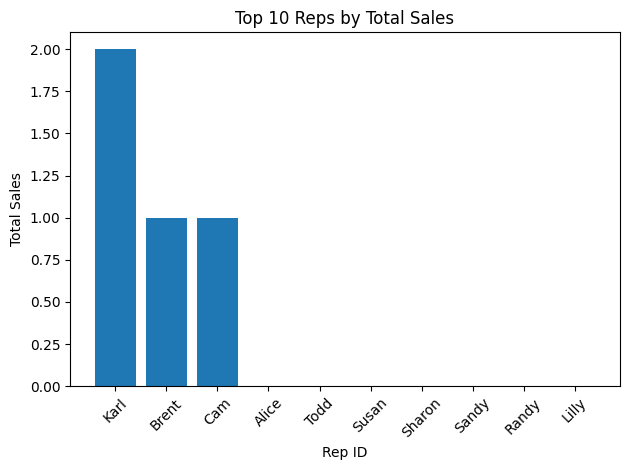

In [31]:
# Top 10 Reps by Total Sales
s = df.groupby('Rep_ID')['Sale_Flag'].sum().sort_values(ascending=False).head(10)
plt.bar(s.index, s.values)
plt.title('Top 10 Reps by Total Sales')
plt.xlabel('Rep ID'); plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout(); plt.show()

Sales are concentrated among a few reps; most reps generate zero sales.
